In [1]:
import deepchem as dc

/home/sohompaul/psi4conda/envs/deepchem/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
RDKit WARNING: [09:01:16] Enabling RDKit 2019.09.3 jupyter extensions
/home/sohompaul/psi4conda/envs/deepchem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sohompaul/psi4conda/envs/deepchem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (typ

In [2]:
import numpy as np

In [3]:
data = np.random.random((4, 4))
labels = np.random.random((4,)) # labels of size 4x1

In [4]:
data, labels

(array([[0.92505065, 0.1893318 , 0.9357315 , 0.39687645],
        [0.10107605, 0.08619288, 0.59667925, 0.42998601],
        [0.64961277, 0.88328678, 0.1356435 , 0.13258632],
        [0.03462397, 0.0127762 , 0.45937922, 0.57762361]]),
 array([0.94982241, 0.65536198, 0.85051639, 0.69076834]))

In [5]:
from deepchem.data.datasets import NumpyDataset

In [6]:
dataset = NumpyDataset(data, labels)

In [7]:
dataset

In [8]:
dataset.X, dataset.y

(array([[0.92505065, 0.1893318 , 0.9357315 , 0.39687645],
        [0.10107605, 0.08619288, 0.59667925, 0.42998601],
        [0.64961277, 0.88328678, 0.1356435 , 0.13258632],
        [0.03462397, 0.0127762 , 0.45937922, 0.57762361]]),
 array([0.94982241, 0.65536198, 0.85051639, 0.69076834]))

In [10]:
for x, y, _, _ in dataset.itersamples():
    print(x, y)

[0.92505065 0.1893318  0.9357315  0.39687645] 0.9498224108611951
[0.10107605 0.08619288 0.59667925 0.42998601] 0.6553619821422614
[0.64961277 0.88328678 0.1356435  0.13258632] 0.8505163904092228
[0.03462397 0.0127762  0.45937922 0.57762361] 0.6907683441963123


In [11]:
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [13]:
train = NumpyDataset(mnist.train.images, mnist.train.labels)
valid = NumpyDataset(mnist.validation.images, mnist.validation.labels)

In [14]:
import matplotlib.pyplot as plt

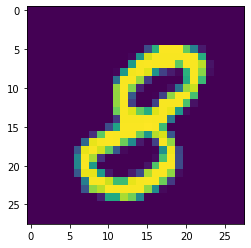

In [15]:
sample = np.reshape(train.X[5], (28, 28))
plt.imshow(sample)
plt.show()

In [16]:
import tensorflow as tf
data_small = np.random.random((4, 5))
label_small = np.random.random((4, ))
dataset = tf.data.Dataset.from_tensor_slices((data_small, label_small))
print("Data\n")
print(data_small)
print("\n Labels")
print(label_small)

Data

[[0.19893632 0.58861303 0.79329386 0.61847091 0.4957805 ]
 [0.51367823 0.55025942 0.92975578 0.65699576 0.72816124]
 [0.47354703 0.89394579 0.03105245 0.29406015 0.88256288]
 [0.92746589 0.15260812 0.85210163 0.60186678 0.69936861]]

 Labels
[0.53131847 0.39989563 0.29986071 0.93267257]


In [17]:
iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
numpy_data = np.zeros((4, 5))
numpy_label = np.zeros((4,))
sess = tf.Session()
for i in range(4):
    data_, label_ = sess.run(next_element)
    numpy_data[i, :] = data_
    numpy_label[i] = label_

    
print("Numpy Data")
print(numpy_data)
print("\n Numpy Label")
print(numpy_label)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Numpy Data
[[0.19893632 0.58861303 0.79329386 0.61847091 0.4957805 ]
 [0.51367823 0.55025942 0.92975578 0.65699576 0.72816124]
 [0.47354703 0.89394579 0.03105245 0.29406015 0.88256288]
 [0.92746589 0.15260812 0.85210163 0.60186678 0.69936861]]

 Numpy Label
[0.53131847 0.39989563 0.29986071 0.93267257]


In [18]:
dataset_ = NumpyDataset(numpy_data, numpy_label)
dataset_.X

array([[0.19893632, 0.58861303, 0.79329386, 0.61847091, 0.4957805 ],
       [0.51367823, 0.55025942, 0.92975578, 0.65699576, 0.72816124],
       [0.47354703, 0.89394579, 0.03105245, 0.29406015, 0.88256288],
       [0.92746589, 0.15260812, 0.85210163, 0.60186678, 0.69936861]])

In [19]:
iterator_ = dataset_.make_iterator()
next_element_ = iterator_.get_next()

sess = tf.Session()
data_and_labels = sess.run(next_element_)

print("Numpy Data")
print(data_and_labels[0])
print("\n Numpy Label")
print(data_and_labels[1])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Numpy Data
[[0.51367823 0.55025942 0.92975578 0.65699576 0.72816124]
 [0.47354703 0.89394579 0.03105245 0.29406015 0.88256288]
 [0.92746589 0.15260812 0.85210163 0.60186678 0.69936861]
 [0.19893632 0.58861303 0.79329386 0.61847091 0.4957805 ]]

 Numpy Label
[0.39989563 0.29986071 0.93267257 0.53131847]
